In [1]:
!cp -r /kaggle/input/yolov8/mydataset /kaggle/working/
!cp -r /kaggle/input/yolov8/mydata.yaml /kaggle/working/mydata.yaml

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [3]:
import os
import random
import shutil
from math import floor

# 定义数据集的路径
dataset_path = '/kaggle/working/mydataset'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# 创建训练、验证和测试集的目录结构
train_images_path = os.path.join(images_path, 'train')
val_images_path = os.path.join(images_path, 'val')
test_images_path = os.path.join(images_path, 'test')

train_labels_path = os.path.join(labels_path, 'train')
val_labels_path = os.path.join(labels_path, 'val')
test_labels_path = os.path.join(labels_path, 'test')

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)
os.makedirs(test_labels_path, exist_ok=True)

# 获取所有图片文件名
image_files = [f for f in os.listdir(images_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 打乱文件顺序
random.shuffle(image_files)

# 计算每个子集的大小
total_images = len(image_files)
train_size = floor(total_images * 0.7)
val_size = floor(total_images * 0.1)
test_size = total_images - train_size - val_size

# 划分数据集
train_files = image_files[:train_size]
val_files = image_files[train_size:train_size + val_size]
test_files = image_files[train_size + val_size:]

def copy_files(file_list, source_dir, dest_dir):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        image_source = os.path.join(source_dir, file_name)
        label_source = os.path.join(labels_path, f"{base_name}.txt")

        image_dest = os.path.join(dest_dir, file_name)
        label_dest = os.path.join(dest_dir.replace('images', 'labels'), f"{base_name}.txt")

        shutil.copy2(image_source, image_dest)
        shutil.copy2(label_source, label_dest)

# 复制训练集文件
copy_files(train_files, images_path, train_images_path)

# 复制验证集文件
copy_files(val_files, images_path, val_images_path)

# 复制测试集文件
copy_files(test_files, images_path, test_images_path)

print("数据集划分完成：")
print(f"训练集: {len(train_files)} 个文件")
print(f"验证集: {len(val_files)} 个文件")
print(f"测试集: {len(test_files)} 个文件")


数据集划分完成：
训练集: 40 个文件
验证集: 5 个文件
测试集: 13 个文件


In [4]:
from ultralytics import YOLO

# 加载预训练模型
model = YOLO('yolov8m.pt')

# 配置数据集路径和参数
data_config = '/kaggle/working/mydata.yaml'
epochs = 200
batch_size = 16

# 开始训练
model.train(data=data_config, epochs=epochs, batch=batch_size, imgsz=640)

100%|██████████| 49.7M/49.7M [00:00<00:00, 237MB/s]


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/mydata.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]
2024-06-07 06:06:32,966	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-07 06:06:34,163	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 75.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/mydataset/labels/train... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 1017.20it/s]

train: New cache created: /kaggle/working/mydataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/mydataset/labels/val... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 932.40it/s]

val: New cache created: /kaggle/working/mydataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      7.37G      4.556       5.04      2.893        247        640: 100%|██████████| 3/3 [00:07<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]

                   all          5         75          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      6.86G      4.622      4.994      2.982        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.85it/s]

                   all          5         75          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      6.97G      4.552      4.915      3.059        289        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.65it/s]

                   all          5         75          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      7.15G      3.757      4.106      2.413        307        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.84it/s]

                   all          5         75    0.00839     0.0892    0.00728    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      7.08G      2.872      3.242      1.671        284        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.79it/s]

                   all          5         75      0.298      0.187     0.0913     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      7.35G      2.389      2.759      1.478        268        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.10it/s]

                   all          5         75      0.375      0.301      0.176     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      7.43G      2.245      2.545      1.298        264        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.78it/s]

                   all          5         75      0.176      0.363      0.269      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      7.31G      2.194      2.393      1.211        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all          5         75      0.177       0.53       0.31       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      7.18G      2.069      2.315      1.234        254        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.07it/s]

                   all          5         75      0.265      0.817      0.428      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200       7.2G      1.971      2.062      1.246        384        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all          5         75      0.362      0.813      0.597      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       7.2G      1.924      2.003        1.2        255        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.60it/s]

                   all          5         75      0.308      0.852      0.513       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      7.28G       1.96      1.942      1.216        280        640: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.83it/s]

                   all          5         75       0.32      0.839      0.511      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      7.28G      1.951          2      1.194        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]

                   all          5         75      0.259      0.856      0.596      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      7.13G      1.851      1.822      1.226        303        640: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.25it/s]

                   all          5         75      0.336       0.88      0.652      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      7.31G      1.943       1.85      1.175        290        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.06it/s]

                   all          5         75       0.41      0.912      0.713      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      7.28G      1.863      1.706      1.186        273        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.17it/s]

                   all          5         75      0.472      0.786      0.672      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      7.41G      1.932      1.686      1.146        259        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]

                   all          5         75       0.54      0.817      0.725      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200       7.3G      1.756      1.599      1.123        268        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.13it/s]

                   all          5         75      0.494      0.847      0.742      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      7.28G      1.786      1.582      1.178        235        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.85it/s]

                   all          5         75      0.628      0.789      0.826      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      7.26G      1.816      1.543      1.188        289        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.11it/s]

                   all          5         75       0.64      0.823      0.815       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      7.18G      1.791      1.619      1.118        309        640: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all          5         75      0.661      0.801       0.78      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      7.09G       1.71      1.512      1.108        264        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.81it/s]

                   all          5         75      0.624      0.831      0.783      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      7.17G      1.766      1.442      1.168        296        640: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.50it/s]

                   all          5         75      0.623      0.813      0.881      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       7.1G      1.811      1.413      1.164        265        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]

                   all          5         75      0.698      0.829      0.904      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      7.14G      1.801      1.435      1.176        315        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.25it/s]

                   all          5         75      0.723      0.808      0.836      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      7.16G      1.751      1.439      1.145        332        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          5         75      0.709      0.817      0.874      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      7.26G      1.797      1.421      1.133        295        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all          5         75      0.694      0.819       0.78       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      7.08G      1.715      1.319      1.123        315        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.03it/s]

                   all          5         75      0.751       0.85      0.835      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      7.29G      1.742      1.261      1.145        271        640: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all          5         75      0.751       0.85      0.835      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      7.27G      1.717      1.289      1.114        294        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all          5         75      0.756       0.82      0.888      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      7.15G      1.647      1.248      1.111        258        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.59it/s]

                   all          5         75      0.802       0.81      0.871      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      7.25G      1.654      1.174      1.144        240        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.60it/s]

                   all          5         75      0.777      0.846      0.859      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      7.27G      1.675      1.223      1.125        275        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.74it/s]

                   all          5         75      0.777      0.846      0.859      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      7.27G      1.613       1.22      1.104        309        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          5         75      0.696      0.887      0.855      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      7.17G      1.649      1.139      1.152        220        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.39it/s]

                   all          5         75       0.74       0.87       0.88      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       7.4G      1.719      1.175       1.17        265        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.92it/s]

                   all          5         75      0.722      0.876       0.87      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      7.08G      1.649      1.159      1.105        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.02it/s]

                   all          5         75      0.722      0.876       0.87      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.29G      1.815      1.306      1.166        305        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.01it/s]

                   all          5         75      0.771      0.908      0.898      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      7.28G      1.717      1.201      1.157        238        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.65it/s]

                   all          5         75      0.596      0.949      0.885      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      7.46G      1.658      1.206      1.082        294        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.43it/s]

                   all          5         75      0.646       0.94      0.853      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      7.26G      1.627      1.164      1.099        333        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.77it/s]

                   all          5         75      0.646       0.94      0.853      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      7.18G      1.609      1.078      1.079        273        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.15it/s]

                   all          5         75      0.778        0.9      0.866      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      7.19G      1.639      1.141      1.109        271        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.79it/s]

                   all          5         75      0.778       0.89      0.859      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      7.29G      1.636       1.14      1.118        288        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.98it/s]

                   all          5         75       0.82      0.915      0.891      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      7.08G      1.587      1.078      1.053        290        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.46it/s]

                   all          5         75       0.82      0.915      0.891      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      7.27G      1.565      1.041      1.061        287        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.77it/s]

                   all          5         75      0.781      0.951       0.88      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      7.24G      1.654      1.116      1.105        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.88it/s]

                   all          5         75      0.754      0.935      0.877      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      7.17G      1.666      1.104      1.124        255        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.01it/s]

                   all          5         75      0.753      0.917      0.931      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      7.17G      1.465     0.9897      1.042        255        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.48it/s]

                   all          5         75      0.753      0.917      0.931      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       7.4G      1.629      1.055      1.034        303        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.89it/s]

                   all          5         75       0.82      0.935      0.957      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      7.25G      1.565      1.054      1.077        299        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.66it/s]

                   all          5         75      0.846       0.94      0.966      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      7.41G      1.517     0.9615      1.093        200        640: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.13it/s]

                   all          5         75      0.823      0.955      0.962      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      7.15G      1.581       1.08      1.101        239        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]

                   all          5         75      0.823      0.955      0.962      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      7.35G      1.553     0.9842      1.067        231        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.93it/s]

                   all          5         75       0.79      0.958      0.947      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      7.25G      1.451     0.9052       1.07        309        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.49it/s]

                   all          5         75      0.821      0.912      0.933      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200       7.2G      1.518      1.023      1.083        225        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.96it/s]

                   all          5         75      0.841      0.911      0.948      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200       7.1G      1.498     0.9752      1.071        215        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.94it/s]

                   all          5         75      0.841      0.911      0.948      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      7.26G      1.452     0.9892      1.052        350        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

                   all          5         75      0.814      0.914      0.973      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      7.29G      1.518     0.8999      1.096        217        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]

                   all          5         75      0.807      0.962      0.977      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      7.17G      1.441     0.9514      1.038        284        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.57it/s]

                   all          5         75      0.798      0.951      0.964      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      7.21G      1.425     0.9156       1.07        263        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.45it/s]

                   all          5         75      0.798      0.951      0.964      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      7.36G      1.522     0.9222      1.038        289        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.53it/s]

                   all          5         75      0.812      0.949      0.924      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      7.27G       1.49     0.9345      1.026        267        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.25it/s]

                   all          5         75       0.83      0.969      0.923      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      7.26G      1.414     0.9072      1.042        311        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]

                   all          5         75      0.817      0.951      0.905      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      7.16G      1.491     0.9241      1.072        217        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.84it/s]

                   all          5         75      0.817      0.951      0.905      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      7.27G      1.452     0.8744      1.032        298        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.35it/s]

                   all          5         75      0.825      0.942      0.935      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      7.18G      1.513     0.9395      1.043        277        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.56it/s]

                   all          5         75      0.828      0.937      0.956      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      7.27G      1.396     0.8766      1.041        216        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.54it/s]

                   all          5         75      0.832      0.936      0.955      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      7.08G      1.378      0.864      1.004        338        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]

                   all          5         75      0.832      0.936      0.955      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      7.29G      1.393     0.8223      1.026        274        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.21it/s]

                   all          5         75      0.827      0.923      0.919      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      7.41G      1.507     0.9149      1.031        334        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.14it/s]

                   all          5         75      0.834       0.94      0.933       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      7.38G      1.454     0.8738      1.084        157        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.62it/s]

                   all          5         75      0.802      0.943      0.929      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      7.07G      1.411     0.8852      1.028        246        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.82it/s]

                   all          5         75      0.802      0.943      0.929      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      7.26G      1.408     0.9037     0.9835        324        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.61it/s]

                   all          5         75      0.833      0.957      0.902      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200       7.4G      1.354     0.8291      1.014        286        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.77it/s]

                   all          5         75      0.833      0.946      0.941      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      7.36G      1.273     0.7846      1.018        247        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.16it/s]

                   all          5         75      0.815      0.938      0.938      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      7.19G      1.384     0.8227     0.9953        318        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.81it/s]

                   all          5         75      0.815      0.938      0.938      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      7.21G      1.305     0.7692      1.005        288        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.43it/s]

                   all          5         75      0.852      0.869      0.919      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      7.28G      1.409       0.82      1.014        281        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all          5         75      0.827      0.937      0.922      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      7.36G      1.332     0.8308      1.014        248        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.59it/s]

                   all          5         75      0.802      0.924       0.92      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      7.16G      1.306     0.7927     0.9934        303        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          5         75      0.802      0.924       0.92      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      7.18G      1.399     0.8435      1.024        254        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]

                   all          5         75      0.812      0.943      0.885      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      7.28G      1.314     0.7994     0.9868        277        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.68it/s]

                   all          5         75      0.823      0.944      0.878      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200       7.3G      1.282     0.7762     0.9602        300        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]

                   all          5         75      0.835      0.933      0.889      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      7.08G      1.337     0.8086      1.001        307        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.29it/s]

                   all          5         75      0.835      0.933      0.889      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      7.17G      1.409     0.8407      1.036        263        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.87it/s]

                   all          5         75      0.834      0.961      0.905      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      7.34G      1.318     0.7455       1.01        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.50it/s]

                   all          5         75      0.813       0.96      0.911      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200       7.4G      1.319     0.7648     0.9805        313        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.24it/s]

                   all          5         75       0.79      0.942       0.89      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      7.35G      1.391     0.8302     0.9892        326        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.62it/s]

                   all          5         75       0.79      0.942       0.89      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      7.26G      1.237     0.7386     0.9994        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.45it/s]

                   all          5         75      0.821      0.913      0.932      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      7.37G      1.229     0.7641     0.9964        294        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.87it/s]

                   all          5         75      0.825      0.937      0.924      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      7.34G       1.27     0.7521     0.9952        268        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all          5         75      0.837      0.957      0.955      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      7.35G      1.264     0.7302      0.984        323        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.24it/s]

                   all          5         75      0.837      0.957      0.955      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      7.31G      1.258     0.7873     0.9962        357        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]

                   all          5         75      0.815      0.963      0.962        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      7.23G      1.249     0.7324     0.9843        327        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.92it/s]

                   all          5         75      0.812      0.972      0.961      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      7.31G      1.199     0.7181     0.9641        347        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.48it/s]

                   all          5         75      0.817      0.965      0.967       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      7.19G      1.288     0.7512     0.9746        217        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.98it/s]

                   all          5         75      0.817      0.965      0.967       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      7.27G      1.183     0.6828     0.9677        218        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all          5         75      0.797      0.972      0.963      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      7.18G      1.243     0.7738     0.9718        276        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.34it/s]

                   all          5         75      0.803      0.969      0.947      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      7.26G      1.286     0.7363     0.9836        276        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.98it/s]

                   all          5         75      0.786      0.942       0.93      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      7.26G      1.248     0.7325     0.9691        307        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.90it/s]

                   all          5         75      0.786      0.942       0.93      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      7.25G      1.265     0.7513     0.9841        235        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.06it/s]

                   all          5         75      0.816      0.943      0.933      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      7.26G      1.252     0.7422     0.9787        255        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all          5         75      0.829      0.935      0.932      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      7.31G      1.161       0.65     0.9741        238        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.48it/s]

                   all          5         75      0.831      0.943      0.938      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      7.26G      1.177     0.6967     0.9607        231        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]

                   all          5         75      0.831      0.943      0.938      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      7.19G      1.152     0.6667     0.9607        220        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         75      0.813      0.937      0.923      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      7.17G      1.133      0.666     0.9518        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.60it/s]

                   all          5         75      0.819      0.944      0.932       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      7.18G      1.206     0.6968     0.9424        263        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.53it/s]

                   all          5         75      0.818       0.93       0.94      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      7.07G      1.195     0.7013     0.9776        238        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.48it/s]

                   all          5         75      0.818       0.93       0.94      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      7.25G      1.218     0.7164     0.9684        311        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.00it/s]

                   all          5         75      0.822      0.937      0.946      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      7.28G      1.196     0.7198      0.964        317        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.35it/s]

                   all          5         75      0.819      0.932       0.94        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200       7.2G      1.159     0.6998     0.9346        357        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.07it/s]

                   all          5         75      0.819      0.953       0.91      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200       7.1G      1.155     0.6913     0.9368        371        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.91it/s]

                   all          5         75      0.819      0.953       0.91      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      7.28G       1.12     0.6646      0.942        271        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

                   all          5         75      0.805       0.95      0.915      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      7.36G      1.211     0.6908     0.9614        211        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]

                   all          5         75      0.823       0.91      0.912      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      7.28G      1.074     0.6345     0.9337        290        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.02it/s]

                   all          5         75      0.799      0.941      0.918      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      7.32G      1.155     0.6791      0.926        236        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.62it/s]

                   all          5         75      0.799      0.941      0.918      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      7.28G      1.141     0.6686     0.9456        227        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.68it/s]

                   all          5         75        0.8      0.942      0.866      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      7.18G      1.111     0.6422     0.9409        306        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.83it/s]

                   all          5         75      0.775      0.947       0.86      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      7.25G      1.118     0.6606     0.9681        275        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.67it/s]

                   all          5         75      0.806      0.949      0.887      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      7.25G      1.089     0.6475     0.9381        286        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.29it/s]

                   all          5         75      0.806      0.949      0.887      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      7.18G      1.039     0.6296      0.931        345        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.40it/s]

                   all          5         75      0.808      0.944      0.894      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      7.38G      1.115     0.6595     0.9097        306        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.84it/s]

                   all          5         75      0.811      0.948      0.898      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      7.37G      1.142     0.6602      1.005        181        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.01it/s]

                   all          5         75      0.783      0.953      0.935      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      7.28G       1.04     0.6236     0.9071        327        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.79it/s]

                   all          5         75      0.783      0.953      0.935      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      7.31G      1.047     0.6156     0.8995        273        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.94it/s]

                   all          5         75      0.807      0.897      0.907      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      7.25G      1.067     0.6049      0.929        282        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.63it/s]

                   all          5         75      0.806      0.941       0.92      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      7.36G      1.073     0.6361     0.9269        281        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.82it/s]

                   all          5         75      0.826      0.946      0.922      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200       7.1G      1.065      0.646     0.9249        274        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.31it/s]

                   all          5         75      0.826      0.946      0.922      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      7.18G      1.053     0.6176     0.9218        265        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.08it/s]

                   all          5         75      0.812      0.936      0.917      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      7.21G      1.092     0.6277     0.9276        332        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.16it/s]

                   all          5         75      0.815      0.938      0.935      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      7.31G      1.046     0.6051     0.9391        281        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.38it/s]

                   all          5         75      0.827      0.945      0.954       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      7.18G      1.043      0.607     0.9026        354        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.76it/s]

                   all          5         75      0.827      0.945      0.954       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      7.29G      1.033     0.6046     0.9166        237        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

                   all          5         75      0.826      0.949      0.956      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      7.27G       1.09     0.6212     0.9421        294        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.95it/s]

                   all          5         75      0.828      0.957       0.97      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      7.19G      1.052     0.6186     0.8951        305        640: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

                   all          5         75      0.817      0.959      0.966      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      7.31G      1.006     0.5898     0.9113        219        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.53it/s]

                   all          5         75      0.817      0.959      0.966      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      7.24G     0.9416     0.5731      0.929        243        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.71it/s]

                   all          5         75      0.814      0.946      0.952      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      7.27G      1.018     0.6112     0.9363        224        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.56it/s]

                   all          5         75       0.81      0.964      0.953      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      7.39G      1.002     0.5868     0.9027        280        640: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.79it/s]

                   all          5         75      0.824      0.948      0.954      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      7.17G     0.9759     0.5918     0.9031        348        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.32it/s]

                   all          5         75      0.824      0.948      0.954      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      7.27G      0.928     0.5457     0.9049        323        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.73it/s]

                   all          5         75      0.835      0.936      0.955      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      7.34G      1.003     0.5777     0.9019        274        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.76it/s]

                   all          5         75      0.844       0.92      0.956        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      7.29G      1.012     0.5927      0.901        313        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.15it/s]

                   all          5         75      0.801      0.956      0.957      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      7.28G     0.8953     0.5351     0.8952        246        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.23it/s]

                   all          5         75      0.801      0.956      0.957      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      7.26G     0.8513     0.5107      0.888        225        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.37it/s]

                   all          5         75      0.792      0.962      0.958      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      7.28G      0.993     0.5615     0.9073        262        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.44it/s]

                   all          5         75       0.81      0.925      0.944      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      7.24G      0.893     0.5255     0.8957        260        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.11it/s]

                   all          5         75      0.825      0.922      0.965      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200       7.2G     0.9124      0.537     0.8874        251        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.23it/s]

                   all          5         75      0.825      0.922      0.965      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      7.26G      1.033     0.5857     0.8943        356        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.76it/s]

                   all          5         75      0.821      0.931      0.968      0.494
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 50, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



150 epochs completed in 0.125 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]


                   all          5         75       0.82      0.935      0.957      0.523
                    c1          2          7      0.865       0.92      0.924       0.32
                    d1          3          3      0.519          1      0.995      0.699
                    e1          4          7      0.739      0.857      0.757      0.439
                    f1          1          1      0.467          1      0.995      0.597
                    g1          4         13      0.991          1      0.995      0.519
                    a1          2          5          1       0.97      0.995      0.689
                    c2          4         11      0.841          1      0.995      0.491
                    d2          4         13      0.996          1      0.995      0.425
                    e2          4         15      0.963      0.667      0.965      0.526
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788b67239cf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

                    epoch        train/box_loss        train/cls_loss  \
0                       1               4.55640               5.04030   
1                       2               4.62200               4.99370   
2                       3               4.55180               4.91510   
3                       4               3.75740               4.10590   
4                       5               2.87160               3.24210   
..                    ...                   ...                   ...   
145                   146               0.85134               0.51068   
146                   147               0.99299               0.56150   
147                   148               0.89300               0.52549   
148                   149               0.91241               0.53697   
149                   150               1.03270               0.58568   

           train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                 2.89280               0.00000   

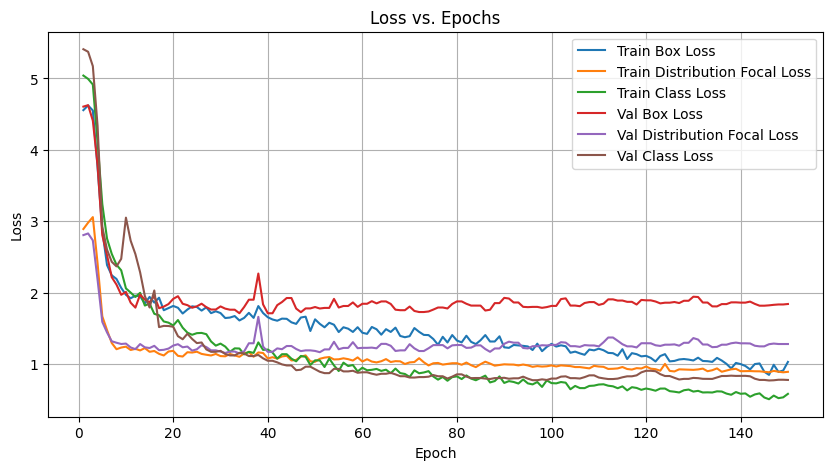

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取训练日志
log_path = '/kaggle/working/runs/detect/train/results.csv'
df = pd.read_csv(log_path)
print(df)
print(print(df.columns)
)
# 去除列名的多余空格
df.columns = df.columns.str.strip()
# 绘制训练和验证损失随训练轮次变化的图像
plt.figure(figsize=(10, 5))

plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train Distribution Focal Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val Distribution Focal Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()


In [6]:
# 验证模型
metrics = model.val(data=data_config)

# 使用测试集进行预测
results = model.predict(source='/kaggle/working/mydataset/images/test', save=True)


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/mydataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all          5         75       0.82      0.935      0.957      0.527
                    c1          2          7      0.865      0.921      0.924       0.32
                    d1          3          3      0.518          1      0.995      0.731
                    e1          4          7      0.739      0.857      0.757      0.439
                    f1          1          1      0.467          1      0.995      0.597
                    g1          4         13      0.991          1      0.995      0.517
                    a1          2          5          1      0.971      0.995      0.681
                    c2          4         11      0.841          1      0.995       0.49
                    d2          4         13      0.996          1      0.995      0.451
                    e2          4         15      0.964      0.667      0.965      0.515
Speed: 0.2ms preprocess, 25.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detec

/kaggle/working/mydataset/images/test/16_12.jpg


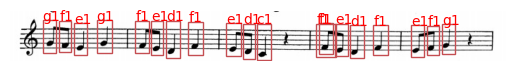

/kaggle/working/mydataset/images/test/16_13.jpg


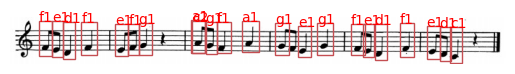

/kaggle/working/mydataset/images/test/16_9.jpg


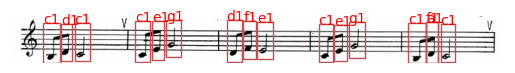

/kaggle/working/mydataset/images/test/17_7.jpg


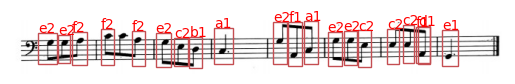

/kaggle/working/mydataset/images/test/18_10.jpg


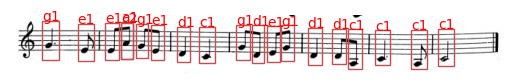

/kaggle/working/mydataset/images/test/20_2.jpg


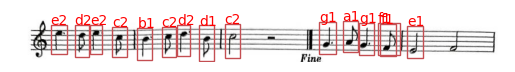

/kaggle/working/mydataset/images/test/32_11.png


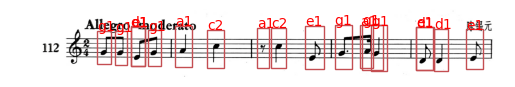

/kaggle/working/mydataset/images/test/32_9.png


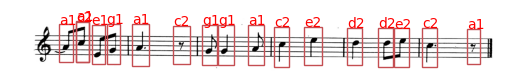

/kaggle/working/mydataset/images/test/llj1.jpg


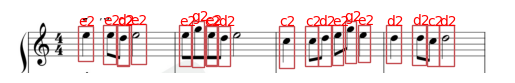

/kaggle/working/mydataset/images/test/llj3.jpg


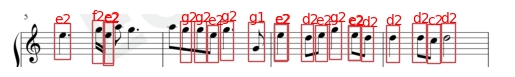

/kaggle/working/mydataset/images/test/llj4.jpg


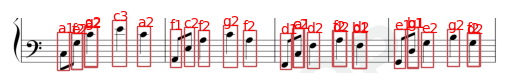

/kaggle/working/mydataset/images/test/llj7.jpg


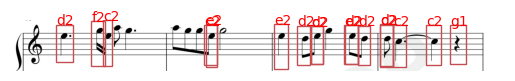

/kaggle/working/mydataset/images/test/llj8.jpg


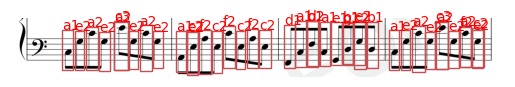

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


detection_info = []

for result in results:
    img_info = {
        "path": result.path,
        "boxes": [],
        "names": []
    }
    # 提取检测框和类别信息
    for box in result.boxes:

        box_info = {
            "coordinates_xy": box.xyxy.tolist(),
            "coordinates_wh": box.xywh.tolist(),
            "confidence": box.conf.tolist(),
            "class": result.names[int(box.cls.item())]
        }
        img_info["boxes"].append(box_info)
        img_info["names"].append(result.names[(box.cls.item())])

    detection_info.append(img_info)


for dete in detection_info:
  # 读取图像
  image = plt.imread(dete['path'])
  print(dete['path'])

  # 创建绘图对象
  fig, ax = plt.subplots()

  # 显示图像
  ax.imshow(image)

  # 为每个框绘制矩形
  for box in dete['boxes']:
      x, y, w, h = box['coordinates_xy'][0][0], box['coordinates_xy'][0][1], box['coordinates_wh'][0][2], box['coordinates_wh'][0][3]
      value = box['class']
      rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
      ax.add_patch(rect)
      plt.annotate(value, (x, y), color='red')

  # 关闭坐标轴
  plt.axis('off')

  # 显示绘图
  plt.show()